Assignment: 6)  Use housing dataset and perform the following: (Easy)
a.	Use preprocessing methods to clean the dataset.
b.	Split the dataset into Train and Test dataset, respectively.
c.	Use train dataset to create a continuous and categorical decision-making model.
d.	Use test set for making predictions
e.	Access the quality of your classification model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [9]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
x=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]

In [13]:
y=df['price']

In [14]:
df.mean()

price               4.766729e+06
area                5.150541e+03
bedrooms            2.965138e+00
bathrooms           1.286239e+00
stories             1.805505e+00
mainroad            8.587156e-01
guestroom           1.779817e-01
basement            3.504587e-01
hotwaterheating     4.587156e-02
airconditioning     3.155963e-01
parking             6.935780e-01
prefarea            2.348624e-01
furnishingstatus    1.069725e+00
dtype: float64

In [15]:
df.median()

price               4340000.0
area                   4600.0
bedrooms                  3.0
bathrooms                 1.0
stories                   2.0
mainroad                  1.0
guestroom                 0.0
basement                  0.0
hotwaterheating           0.0
airconditioning           0.0
parking                   0.0
prefarea                  0.0
furnishingstatus          1.0
dtype: float64

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =4)

In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [20]:
y_pred  =  classifier.predict(x_test)
y_pred

array([2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1,
       2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0])

In [21]:
y_test

array([1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [23]:
# now preparing our model as per Gaussian Naive Bayesian

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(x_train, y_train) #fitting our model

In [24]:
y_pred = model.predict(x_test) #now predicting our model to our test dataset

In [25]:
from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)

0.44954128440366975


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf=DecisionTreeClassifier(random_state=0,criterion="gini")
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.38      0.36      0.37        36
           1       0.63      0.52      0.57        46
           2       0.41      0.56      0.47        27

    accuracy                           0.48       109
   macro avg       0.47      0.48      0.47       109
weighted avg       0.49      0.48      0.48       109

[[13  9 14]
 [14 24  8]
 [ 7  5 15]]
47.706422018348626


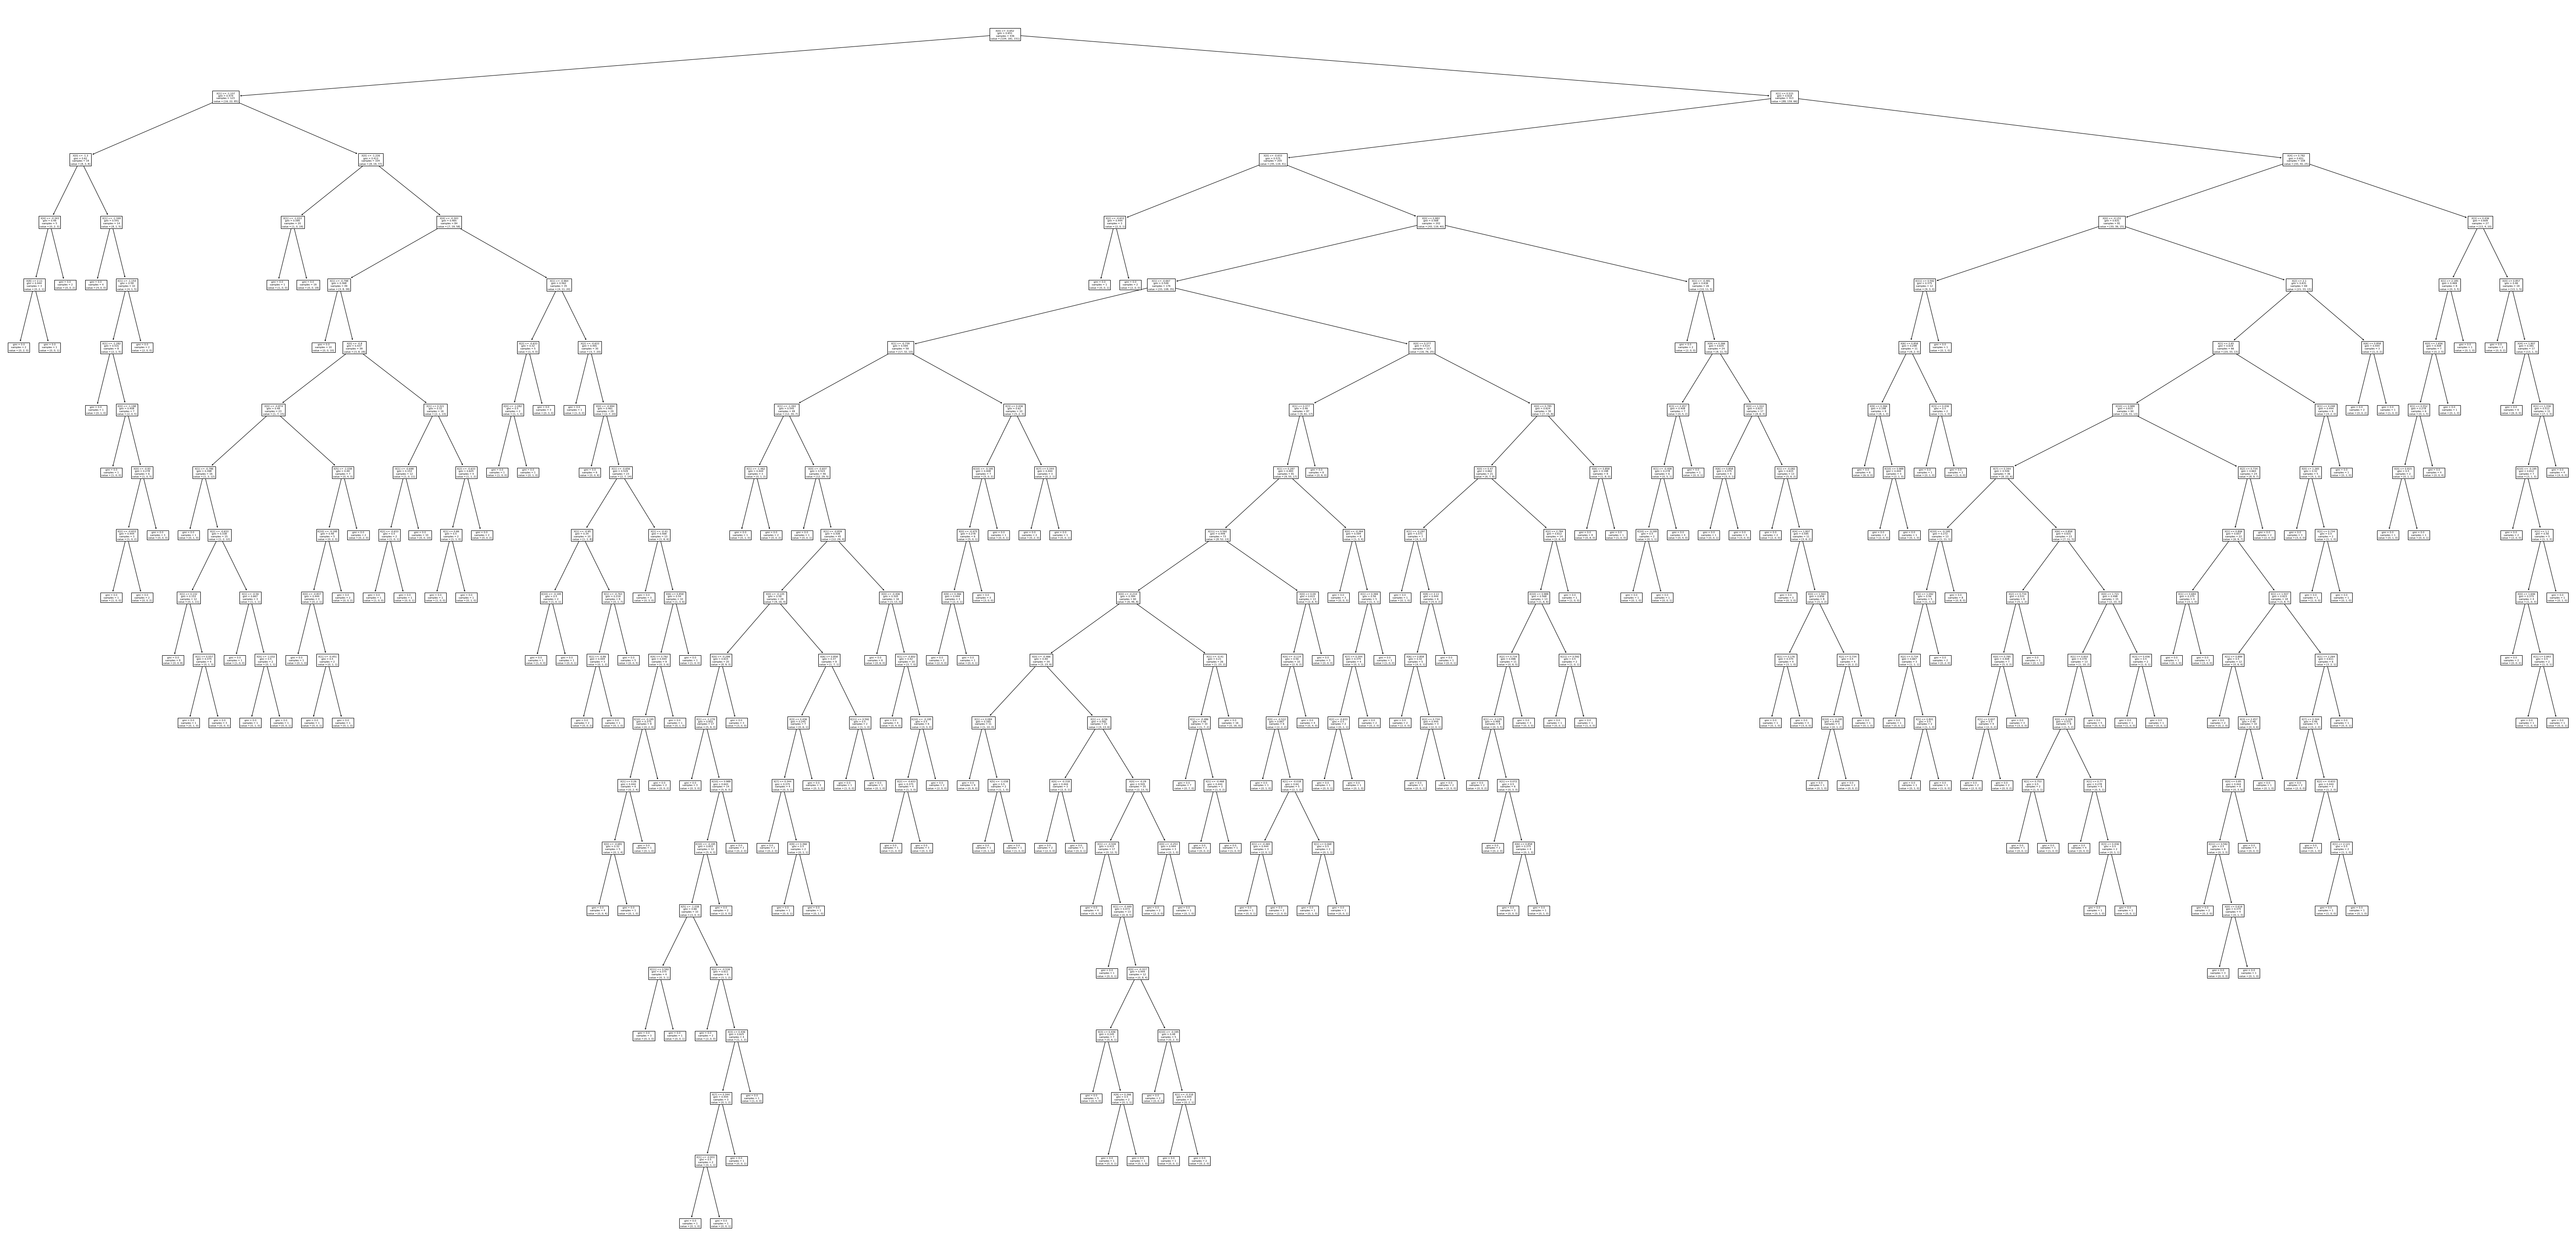

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(clf.fit(x_train, y_train))
plt.show()

In [31]:
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test, y_pred))

r2_score: -0.9274977895667551
